In [ ]:
#| notest
# Configure content directory for cross-platform compatibility
import os
from pathlib import Path

# Use environment variable if set, otherwise use repo-relative path
CONTENT_DIR = Path(os.environ.get("NBDEV_CONTENT_DIR", os.environ.get("CONTENT_DIR", Path.cwd() / "content")))
CONTENT_DIR.mkdir(parents=True, exist_ok=True)

def get_content_path(*path_parts):
    """Get a path within the content directory."""
    return CONTENT_DIR.joinpath(*path_parts)

def ensure_content_dir(*path_parts):
    """Ensure a subdirectory exists within the content directory."""
    path = get_content_path(*path_parts)
    path.mkdir(parents=True, exist_ok=True)
    return path

### **Packages Installation**

In [ ]:
!pip install -q rfdetr==1.2.1 supervision==0.26.1 roboflow
!pip install paddleocr
!pip install pymupdf pillow
!pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 16.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.8/372.8 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Downloading the Dataset and the weights of the pre trained model**

In [ ]:
!pip install gdown

**Download the Dataset**

In [ ]:
#| notest
!pip install --quiet gdown

In [ ]:
import re, subprocess, shutil, os

def download_and_extract(link_or_id, dest="Dataset"):
    m = re.search(r'id=([A-Za-z0-9_-]+)', link_or_id) or re.search(r'/d/([A-Za-z0-9_-]+)', link_or_id)
    if not m:
        raise ValueError("Paste a valid Google Drive file link")
    fid = m.group(1)

    print("Downloading zip...")
    url = f"https://drive.google.com/uc?id={fid}"
    subprocess.run(["gdown", url, "-O", "dataset.zip"], check=True)

    if os.path.exists(dest):
        shutil.rmtree(dest)

    os.makedirs(dest, exist_ok=True)

    print("Extracting zip to folder...")
    subprocess.run(["unzip", "-q", "dataset.zip", "-d", dest], check=True)

    print(f"Done — check the local '{dest}' folder.")
    
link = "https://drive.google.com/file/d/147pOV428WE6wdpvcL8uyNKm96LgBj3VF/view?usp=sharing"
download_and_extract(link, dest="Dataset")

Extracting zip to folder...
Done — check the local 'Dataset' folder.


**Download the Weights of the RF-DETR**

In [ ]:
#| notest
!pip install --quiet gdown

In [ ]:
import re
import subprocess
from pathlib import Path

def download_drive_to_weights(link_or_id):
    dest = "weights"
    Path(dest).mkdir(parents=True, exist_ok=True)
    print(f"Using '{dest}' folder for downloads...")

    s = str(link_or_id).strip()

    m = re.search(r'folders/([A-Za-z0-9_-]+)', s) or re.search(r'id=([A-Za-z0-9_-]+)', s)
    if not m:
        m = re.search(r'/d/([A-Za-z0-9_-]+)', s) or re.search(r'([A-Za-z0-9_-]{10,})$', s)
    if not m:
        print("Couldn't parse an ID from the input. Please paste the folder link or the long '1...' id.")
        return
    fid = m.group(1)

    use_folder = ('folders' in s) or (len(fid) > 20)

    try:
        if use_folder:
            print("Downloading Drive folder to ./weights ...")
            subprocess.run(
                ["gdown", "--folder", f"https://drive.google.com/drive/folders/{fid}", "-O", dest],
                check=True
            )
        else:
            print("Downloading file to ./weights ...")
            url = f"https://drive.google.com/uc?id={fid}"
            subprocess.run(
                ["gdown", url, "-O", dest],
                check=True
            )

        print("Done — check the local 'weights' folder.")
    except subprocess.CalledProcessError as e:
        print("gdown failed:", e)
        
link_or_id = "https://drive.google.com/drive/folders/17CXXFCGw5npR1cyrg082yq1IdcnH6-ms?usp=sharing"
download_drive_to_weights(link_or_id)

Using 'weights' folder for downloads...
Done — check the local 'weights' folder.


**Clone the Sam2 Model**

In [4]:
!git clone https://github.com/facebookresearch/sam2.git
%cd sam2
!pip install -e .

Cloning into 'sam2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 11.61 MiB/s, done.
Resolving deltas: 100% (380/380), done.
Updating files: 100% (569/569), done.
/content/sam2
Obtaining file:///content/sam2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.6 MB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=sam_2-1.0-0.editable-cp312-cp312-linux_x86_64.whl size=13852 sha256=f87822b85d374b5db5dd1b43bd7b95cd61395b461bf2e45266cae9a65f542ff4
  Stored in directory: /tmp/pip-e

In [5]:
%cd ..

/content


def download_and_extract_strip_top_folder(link_or_id, dest=None):
    if dest is None:
        dest = get_content_path("angle-models-weights")
    else:
        dest = Path(dest)

In [6]:

!pip install --quiet gdown

import re
import shutil
import os
import subprocess
import zipfile

def download_and_extract_strip_top_folder(link_or_id, dest="/content/angle-models-weights"):
    m = re.search(r'id=([A-Za-z0-9_-]+)', link_or_id) or re.search(r'/d/([A-Za-z0-9_-]+)', link_or_id)
    if not m:
        raise ValueError("Paste a valid Google Drive file link")
    fid = m.group(1)

    print("Downloading zip...")
    url = f"https://drive.google.com/uc?id={fid}"

    if os.path.exists(dest):
        shutil.rmtree(dest)
    os.makedirs(dest)

    subprocess.run(["gdown", url, "-O", "weights.zip"], check=True)

    print("Extracting zip file and stripping top-level folder...")

    with zipfile.ZipFile("weights.zip", 'r') as zip_ref:

        all_paths = zip_ref.namelist()
        top_level_dirs = set([p.split('/')[0] for p in all_paths if p.strip() != ''])
        if len(top_level_dirs) == 1:
            top_folder = list(top_level_dirs)[0]
        else:
            top_folder = None

        for member in all_paths:
            if top_folder:
                rel_path = member[len(top_folder)+1:] if member.startswith(top_folder + '/') else member
            else:
                rel_path = member

            if rel_path == '':

                continue

            dest_path = os.path.join(dest, rel_path)
            if member.endswith('/'):
                os.makedirs(dest_path, exist_ok=True)
            else:
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                with zip_ref.open(member) as source, open(dest_path, 'wb') as target:
                    shutil.copyfileobj(source, target)

    print(f"Done — check the local '{dest}' folder.")


link = "https://drive.google.com/file/d/1uI2GlE5JviTJccZxzLP5lQ6YiwjYTvVe/view?usp=sharing"
download_and_extract_strip_top_folder(link, dest="/content/angle-models-weights")


Extracting zip file and stripping top-level folder...
Done — check the local '/content/angle-models-weights' folder.


def download_file_from_gdrive(link_or_id, dest_folder=None, filename=None):
    if dest_folder is None:
        dest_folder = get_content_path("sam2", "checkpoints")
    else:
        dest_folder = Path(dest_folder)

In [7]:

import re
import os
import subprocess

def download_file_from_gdrive(link_or_id, dest_folder="/content/sam2/checkpoints", filename=None):
    m = re.search(r'id=([A-Za-z0-9_-]+)', link_or_id) or re.search(r'/d/([A-Za-z0-9_-]+)', link_or_id)
    if not m:
        raise ValueError("Paste a valid Google Drive file link")
    fid = m.group(1)

    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    url = f"https://drive.google.com/uc?id={fid}"

    if not filename:

        filename = f"{fid}.pt"

    file_path = os.path.join(dest_folder, filename)

    print(f"Downloading file to {file_path} ...")
    subprocess.run(["gdown", url, "-O", file_path], check=True)
    print("Download complete.")


link = "https://drive.google.com/file/d/11L0iHZ1Ktcjhd0vqKI_3-PJ3DTv2UyOc/view?usp=sharing"

download_file_from_gdrive(link, dest_folder="/content/sam2/checkpoints", filename="sam2_hiera_base_plus.pt")


Download complete.


dataset = str(get_content_path("Dataset", "AiBoardScannerDataSet.coco"))

In [ ]:
dataset='/content/Dataset/AiBoardScannerDataSet.coco'

Image.open(get_content_path("weights", "metrics_plot.png"))

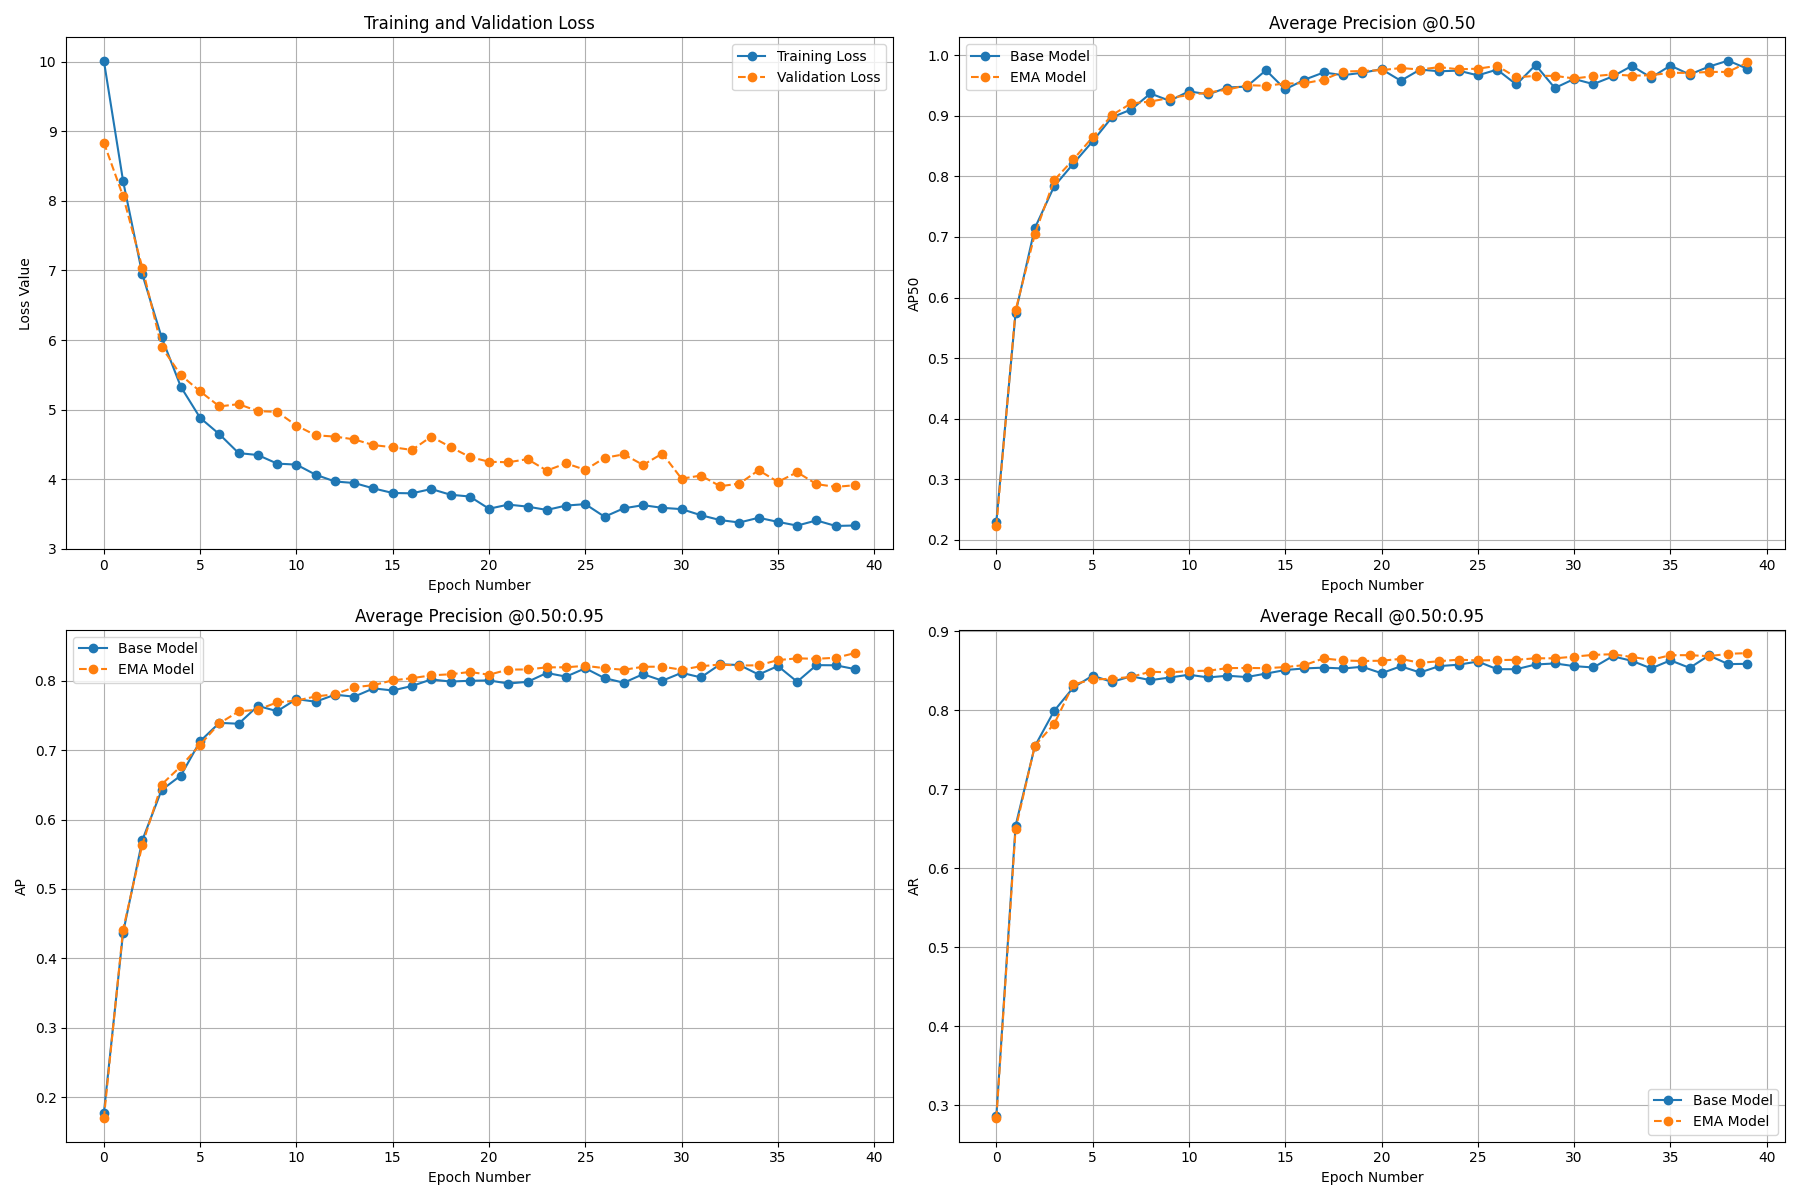

In [ ]:
preTrainedWeights = str(get_content_path("weights", "checkpoint_best_regular.pth"))

dataset = str(get_content_path("Dataset", "AiBoardScannerDataSet.coco"))

In [ ]:
preTrainedWeights = str(get_content_path("weights", "checkpoint_best_regular.pth"))

In [ ]:
Image.open(get_content_path("weights", "metrics_plot.png"))

Image loaded successfully.


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing detection head with 16 classes
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


detections = [
    ('Racetrack', (525.43798828125, 337.20953369140625), (772.7925415039062, 731.5386962890625)),
    ('circle', (75.26021575927734, 353.7659912109375), (211.26466369628906, 485.6578369140625)),
    ('Pentagon', (197.82093811035156, 192.63380432128906), (629.0830688476562, 607.8374633789062)),
    ('Racetrack', (399.3763732910156, 37.14316940307617), (734.2215576171875, 357.04290771484375)),
    ('circle', (191.36500549316406, 624.5045776367188), (327.5169677734375, 757.7999877929688)),
    ('circle', (540.4708862304688, 566.7578735351562), (676.06787109375, 699.739501953125)),
    ('Racetrack', (91.32276916503906, 34.96403884887695), (442.41143798828125, 351.8035888671875)),
    ('circle', (579.9710083007812, 197.84326171875), (715.2356567382812, 331.45751953125)),
    ('circle', (289.7023010253906, 63.5079460144043), (423.3017883300781, 196.29493713378906)),
    ('Racetrack', (181.86737060546875, 609.5239868164062), (572.858642578125, 773.0011596679688)),
    ('Racetra

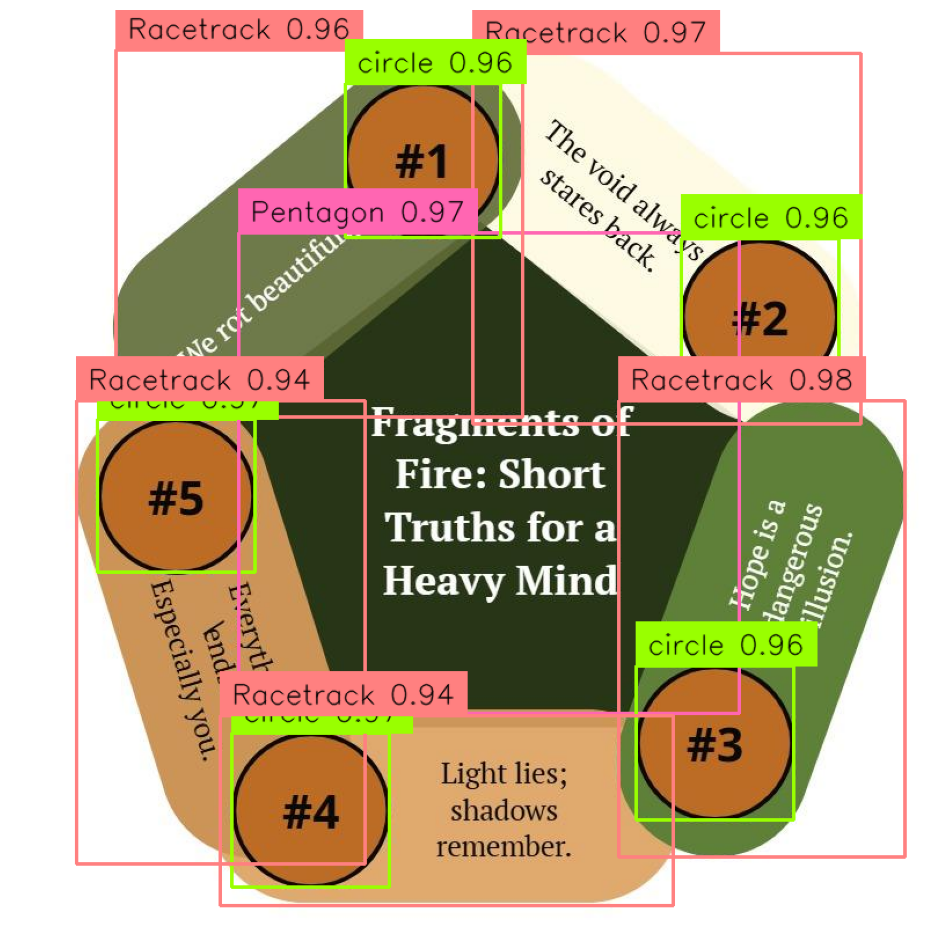

In [ ]:
preTrainedWeights = str(get_content_path("weights", "checkpoint_best_regular.pth"))

Image.open(get_content_path("weights", "confusion_matrix.png"))

In [ ]:
Image.open(get_content_path("weights", "metrics_plot.png"))

[
  {
    "class": "Diamond",
    "confidence": 0.9714662432670593,
    "bbox": {
      "x1": 29.127370834350586,
      "y1": 407.62640380859375,
      "x2": 239.15098571777344,
      "y2": 544.3034057617188
    }
  },
  {
    "class": "Diamond",
    "confidence": 0.9698772430419922,
    "bbox": {
      "x1": 28.874351501464844,
      "y1": 227.95535278320312,
      "x2": 238.50436401367188,
      "y2": 363.88623046875
    }
  },
  {
    "class": "Racetrack",
    "confidence": 0.9692795872688293,
    "bbox": {
      "x1": 384.4695739746094,
      "y1": 255.876953125,
      "x2": 697.0001220703125,
      "y2": 361.5684509277344
    }
  },
  {
    "class": "Diamond",
    "confidence": 0.9654581546783447,
    "bbox": {
      "x1": 29.296884536743164,
      "y1": 47.461517333984375,
      "x2": 238.36622619628906,
      "y2": 183.186767578125
    }
  },
  {
    "class": "Triangle",
    "confidence": 0.9631335139274597,
    "bbox": {
      "x1": 844.4630737304688,
      "y1": 72.72488403320

preTrainedWeights = str(get_content_path("weights", "checkpoint_best_regular.pth"))

Image.open(get_content_path("weights", "confusion_matrix.png"))

In [ ]:
Image.open(get_content_path("weights", "metrics_plot.png"))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might ne

In [ ]:
preTrainedWeights = str(get_content_path("weights", "checkpoint_best_regular.pth"))

Checking connectivity to the model hosters, this may take a while. To bypass this check, set `DISABLE_MODEL_SOURCE_CHECK` to `True`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.yml:   0%|          | 0.00/735 [00:00<?, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.74M [00:00<?, ?B/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-OCRv5_server_det`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/903 [00:00<?, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/87.9M [00:00<?, ?B/s]

Creating model: ('en_PP-OCRv5_mobile_rec', None)
Using official model (en_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/7.77M [00:00<?, ?B/s]

{'res': {'input_path': None, 'page_index': None, 'model_settings': {'use_doc_preprocessor': False, 'use_textline_orientation': True}, 'dt_polys': array([[[471,  87],
        ...,
        [453, 108]],

       ...,

       [[365, 713],
        ...,
        [365, 733]]], dtype=int16), 'text_det_params': {'limit_side_len': 64, 'limit_type': 'min', 'thresh': 0.3, 'max_side_limit': 4000, 'box_thresh': 0.6, 'unclip_ratio': 1.5}, 'text_type': 'general', 'textline_orientation_angles': array([0, ..., 0]), 'text_rec_score_thresh': 0.0, 'return_word_box': False, 'rec_texts': ['The void always', '#1', 'stares back.', '#2', 'We rot beautifully.', 'Fragments of', 'Fire: Short', '#5', 'Truths for', 'a', 'Especially you.', 'Heavy Mind', 'Everything', 'Hope is a', 'lends.', 'dangerous', 'illusion', '#3', 'Light', 'lies;', '#4', 'shadows', 'remember.'], 'rec_scores': array([0.99967277, ..., 0.99994493]), 'rec_polys': array([[[471,  87],
        ...,
        [453, 108]],

       ...,

       [[365, 713],


Image.open(get_content_path("weights", "confusion_matrix.png"))

Processed OCR data (full 360° rotation):
----------------------------------------------------------------------
The void always      | Raw:  319.0° → Rounded: 315°
#1                   | Raw:    0.0° → Rounded: 0°
stares back.         | Raw:  321.4° → Rounded: 315°
#2                   | Raw:    0.0° → Rounded: 0°
We rot beautifully.  | Raw:   39.5° → Rounded: 45°
Fragments of         | Raw:    0.0° → Rounded: 0°
Fire: Short          | Raw:  359.4° → Rounded: 360°
#5                   | Raw:    1.9° → Rounded: 0°
Truths for           | Raw:    0.0° → Rounded: 0°
a                    | Raw:    0.0° → Rounded: 0°
Especially you.      | Raw:  285.8° → Rounded: 285.8°
Heavy Mind           | Raw:    0.0° → Rounded: 0°
Everything           | Raw:  284.0° → Rounded: 284.0°
Hope is a            | Raw:  249.2° → Rounded: 249.2°
lends.               | Raw:  285.0° → Rounded: 285.0°
dangerous            | Raw:  250.6° → Rounded: 250.6°
illusion             | Raw:  248.1° → Rounded: 248.1°
#3     

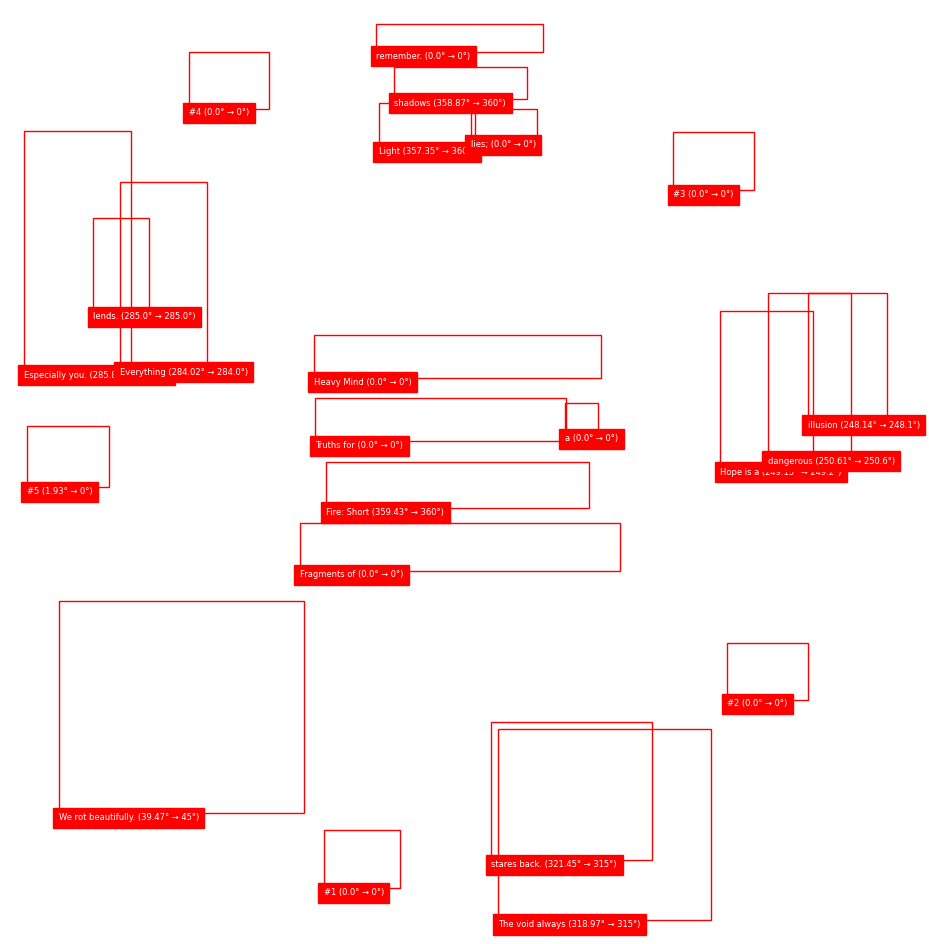

In [ ]:
Image.open(get_content_path("weights", "metrics_plot.png"))

preTrainedWeights = str(get_content_path("weights", "checkpoint_best_regular.pth"))

Image.open(get_content_path("weights", "confusion_matrix.png"))

In [ ]:
Image.open(get_content_path("weights", "metrics_plot.png"))


=== Results from Full Pipeline ===



--- ARROW CONNECTION RESULTS ---


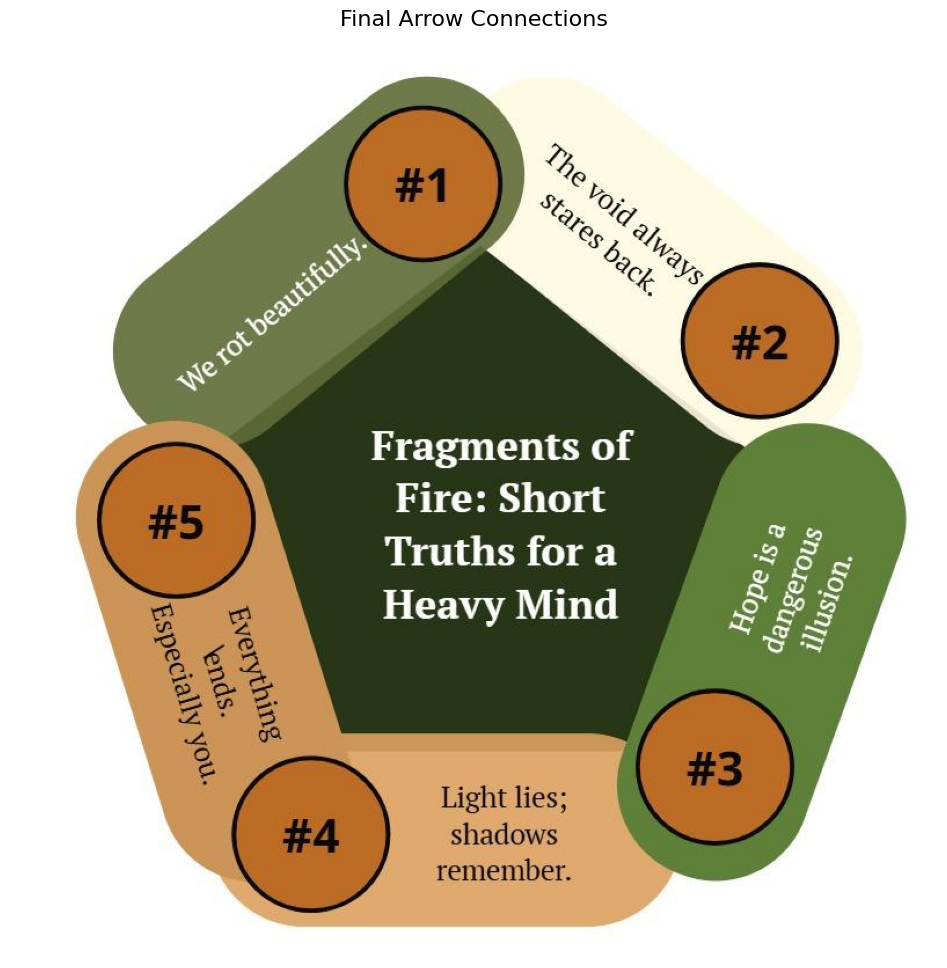

In [ ]:
preTrainedWeights = str(get_content_path("weights", "checkpoint_best_regular.pth"))

Image.open(get_content_path("weights", "confusion_matrix.png"))

**Run once when the notebook is run from start**

In [11]:
%cd sam2

/content/sam2


In [12]:
def get_text_rotation_for_shape(shape_bbox, ocr_data, threshold=0.5):

    sx1, sy1, sx2, sy2 = shape_bbox
    shape_area = (sx2 - sx1) * (sy2 - sy1)

    best_overlap = 0
    best_rotation = None

    for ocr_item in ocr_data:
        tx1, ty1, tx2, ty2 = ocr_item['bbox']

        ix1 = max(sx1, tx1)
        iy1 = max(sy1, ty1)
        ix2 = min(sx2, tx2)
        iy2 = min(sy2, ty2)

        if ix1 < ix2 and iy1 < iy2:
            intersection = (ix2 - ix1) * (iy2 - iy1)
            text_area = (tx2 - tx1) * (ty2 - ty1)

            overlap_ratio = intersection / text_area if text_area > 0 else 0

            if overlap_ratio > threshold and overlap_ratio > best_overlap:
                best_overlap = overlap_ratio
                best_rotation = ocr_item.get('polygon_rotation',
                                            ocr_item.get('paddleocr_orientation', 0))

    return best_rotation

In [13]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
def check_overlap(box1, box2):
    x1_a, y1_a, x2_a, y2_a = box1
    x1_b, y1_b, x2_b, y2_b = box2
    if x2_a < x1_b or x2_b < x1_a:
        return False
    if y2_a < y1_b or y2_b < y1_a:
        return False
    return True
detections = detections_list
include_labels = set([
    "Pentagon", "Racetrack",
    "Triangle", "arrow", "rectangle"
])
filtered_detections = [det for det in detections if det[0] in include_labels]
boxes = [[float(x1), float(y1), float(x2), float(y2)] for _, (x1, y1), (x2, y2) in filtered_detections]
os.chdir("/content/sam2/sam2/configs/sam2")
model_cfg = "sam2_hiera_b+.yaml"
sam2_checkpoint = "/content/sam2/checkpoints/sam2_hiera_base_plus.pt"
sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cpu")
predictor = SAM2ImagePredictor(sam2_model)
image = Image.open(file_path).convert("RGB")
completable_shapes = {'circle', 'rounded rectangle', 'rectangle', 'Racetrack'}
occlusion_flags = []
for i in range(len(filtered_detections)):
    is_occluded = False
    label_i = filtered_detections[i][0]
    box_i = boxes[i]
    if label_i in completable_shapes:
        for j in range(len(filtered_detections)):
            if i == j: continue
            box_j = boxes[j]
            if check_overlap(box_i, box_j):
                is_occluded = True
                break
    occlusion_flags.append(is_occluded)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
angle_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])
model_configs = {
    'rectangle': {"path": "/content/angle-models-weights/final_rectangle.pth", "num_classes": 4},
    'Triangle': {"path": "/content/angle-models-weights/Triangle.pth", "num_classes": 4},
    'Racetrack': {"path": "/content/angle-models-weights/final_racetrack.pth", "num_classes": 4},
    'Pentagon': {"path": "/content/angle-models-weights/best_resnet18_pentagon.pth", "num_classes": 2},
    'arrow': {"path": "/content/angle-models-weights/best_resnet18_arrow.pth", "num_classes": 4},
}
angle_models = {}
for shape_name, config in model_configs.items():
    if os.path.exists(config["path"]):
        model = models.resnet18(pretrained=False)
        model.fc = nn.Linear(model.fc.in_features, config["num_classes"])
        model.load_state_dict(torch.load(config["path"], map_location=device))
        model = model.to(device)
        model.eval()
        angle_models[shape_name] = model
        print(f"Loaded angle model for {shape_name} from {config['path']}")
    else:
        print(f"Warning: Angle model for {shape_name} not found at {config['path']}")
triangle_aux_model_path = "/content/angle-models-weights/Triangle_Angle_90_270.pth"
if os.path.exists(triangle_aux_model_path):
    triangle_aux_model = models.resnet18(pretrained=False)
    triangle_aux_model.fc = nn.Linear(triangle_aux_model.fc.in_features, 2)
    triangle_aux_model.load_state_dict(torch.load(triangle_aux_model_path, map_location=device))
    triangle_aux_model = triangle_aux_model.to(device)
    triangle_aux_model.eval()
    angle_models["triangle_aux"] = triangle_aux_model
def predict_angle(pil_image, model):
    img_tensor = angle_transform(pil_image).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(img_tensor)
        _, pred = torch.max(outputs, 1)
    return pred.item()
with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(image)
    masks, iou_predictions, _ = predictor.predict(box=boxes)
print(f"Processed {len(boxes)} bounding boxes.")
print(f"Received {len(masks)} sets of mask candidates.")

predicted_angles = []
for i in range(len(boxes)):
    label = filtered_detections[i][0]
    is_occluded = occlusion_flags[i]
    original_bbox = boxes[i]
    box_masks = masks[i]
    box_scores = iou_predictions[i]
    best_mask_index = torch.argmax(torch.from_numpy(box_scores))
    best_mask = box_masks[best_mask_index]
    mask_binary = (best_mask > 0).astype(np.uint8)
    contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        processed_mask = np.zeros_like(mask_binary)
        if label in completable_shapes and is_occluded:
            print(f"Applying occlusion correction to '{label}' (Box {i}).")
            if label == 'circle':
                (x, y), radius = cv2.minEnclosingCircle(largest_contour)
                cv2.circle(processed_mask, (int(x), int(y)), int(radius), (1), thickness=cv2.FILLED)
            elif label == 'Racetrack':
                rect = cv2.minAreaRect(largest_contour)
                center, (width, height), angle = rect
                if width < height:
                    width, height = height, width
                    angle += 90
                radius = height / 2
                if width <= height:
                    cv2.circle(processed_mask, (int(center[0]), int(center[1])), int(radius), (1), thickness=cv2.FILLED)
                else:
                    rect_center = np.array(center)
                    angle_rad = np.deg2rad(angle)
                    half_rect_len = width / 2 - radius
                    dx = np.cos(angle_rad) * half_rect_len
                    dy = np.sin(angle_rad) * half_rect_len
                    p1 = rect_center + np.array([dx, dy])
                    p2 = rect_center - np.array([dx, dy])
                    cv2.circle(processed_mask, (int(p1[0]), int(p1[1])), int(radius), (1), thickness=cv2.FILLED)
                    cv2.circle(processed_mask, (int(p2[0]), int(p2[1])), int(radius), (1), thickness=cv2.FILLED)
                    perp_dx = -np.sin(angle_rad) * radius
                    perp_dy = np.cos(angle_rad) * radius
                    corner1 = p1 + np.array([perp_dx, perp_dy])
                    corner2 = p1 - np.array([perp_dx, perp_dy])
                    corner3 = p2 - np.array([perp_dx, perp_dy])
                    corner4 = p2 + np.array([perp_dx, perp_dy])
                    rect_contour = np.array([corner1, corner2, corner3, corner4], dtype=np.intp)
                    cv2.drawContours(processed_mask, [rect_contour], 0, (1), thickness=cv2.FILLED)
            else:
                hull = cv2.convexHull(largest_contour)
                cv2.drawContours(processed_mask, [hull], -1, (1), thickness=cv2.FILLED)
        else:
            cv2.drawContours(processed_mask, [largest_contour], -1, (1), thickness=cv2.FILLED)
        mask_binary = processed_mask

    rows = np.any(mask_binary, axis=1)
    cols = np.any(mask_binary, axis=0)
    if not rows.any() or not cols.any():
        print(f"Mask for box {i} is empty after processing, skipping.")
        continue
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    padding_percentage = 0.1
    height_pad = rmax - rmin
    width_pad = cmax - cmin
    padding_y = int(height_pad * padding_percentage)
    padding_x = int(width_pad * padding_percentage)
    padded_rmin = rmin - padding_y
    padded_rmax = rmax + padding_y
    padded_cmin = cmin - padding_x
    padded_cmax = cmax + padding_x
    full_mask_height, full_mask_width = mask_binary.shape
    padded_rmin = max(0, padded_rmin)
    padded_rmax = min(full_mask_height - 1, padded_rmax)
    padded_cmin = max(0, padded_cmin)
    padded_cmax = min(full_mask_width - 1, padded_cmax)
    padded_crop = mask_binary[padded_rmin:padded_rmax+1, padded_cmin:padded_cmax+1]
    final_image_rgb = np.zeros((padded_crop.shape[0], padded_crop.shape[1], 3), dtype=np.uint8)
    random_color = np.random.randint(0, 256, size=3)
    for c in range(3):
        final_image_rgb[:, :, c][padded_crop == 1] = random_color[c]
    cropped_pil_image = Image.fromarray(final_image_rgb)

    predicted_angle_info = "N/A"
    angle_source = "none"


    x1, y1, x2, y2 = original_bbox
    shape_bbox = (int(x1), int(y1), int(x2), int(y2))

    if 'final_processed_data' in dir() and final_processed_data:
        text_rotation = get_text_rotation_for_shape(shape_bbox, final_processed_data)
        if text_rotation is not None:
            normalized_rotation = text_rotation % 360
            predicted_angle_info = f"{normalized_rotation:.1f} "
            angle_source = "ocr_text"
            print(f"Using OCR text rotation for '{label}' (Box {i}): {predicted_angle_info}")


    if angle_source == "none" and label in angle_models:
        angle_model = angle_models[label]
        num_classes = model_configs[label]["num_classes"]
        angle_class = predict_angle(cropped_pil_image, angle_model)
        angle_source = "resnet_model"

        if label == 'Pentagon':
            if angle_class == 0:
                predicted_angle_info = "0 "
            elif angle_class == 1:
                predicted_angle_info = "180 "
            else:
                predicted_angle_info = f"Pentagon Class {angle_class}"
        elif label == 'rectangle':
            x1, y1, x2, y2 = original_bbox
            width = x2 - x1
            height = y2 - y1
            if abs(width - height) < 5:
                predicted_angle_info = "0 "
            elif height >= 2 * width:
                predicted_angle_info = "90 "
            else:
                predicted_angle_info = "0 "
        elif label == 'Racetrack':
            racetrack_angles = {0: "45 ", 1: "90 ", 2: "135 ", 3: "0 "}
            predicted_angle_info = racetrack_angles.get(angle_class, f"Racetrack Class {angle_class}")
        elif label == 'Triangle':
            if angle_class == 0:
                predicted_angle_info = "0 "
            elif angle_class == 2:
                predicted_angle_info = "180 "
            else:
                if "triangle_aux" in angle_models:
                    aux_class = predict_angle(cropped_pil_image, angle_models["triangle_aux"])
                    if aux_class == 0:
                        predicted_angle_info = "90  (rightward tip)"
                    elif aux_class == 1:
                        predicted_angle_info = "270  (leftward tip)"
                    else:
                        predicted_angle_info = f"Triangle Auxiliary Class {aux_class} (unknown direction)"
                else:
                    predicted_angle_info = "Triangle auxiliary weights not found."
        elif label in ['arrow']:
            arrow_angles = {0: "0 ", 1: "90 ", 2: "180 ", 3: "270 "}
            predicted_angle_info = arrow_angles.get(angle_class, f"{label.capitalize()} Class {angle_class}")
        else:
            if num_classes == 8:
                angle_class_to_degrees_8_classes = {
                    0: "0 ", 1: "45 ", 2: "90 ", 3: "135 ",
                    4: "180 ", 5: "225 ", 6: "270 ", 7: "315 "
                }
                predicted_angle_info = angle_class_to_degrees_8_classes.get(angle_class, f"Class {angle_class} (Unknown Degree)")
            elif num_classes == 4:
                generic_4_class_angles = {
                    0: "0 ", 1: "90 ", 2: "180 ", 3: "270 "
                }
                predicted_angle_info = generic_4_class_angles.get(angle_class, f"Class {angle_class} (Unknown Degree)")
            elif num_classes == 2:
                generic_2_class_angles = {
                    0: "0 ", 1: "180 "
                }
                predicted_angle_info = generic_2_class_angles.get(angle_class, f"Class {angle_class} (Unknown Degree)")
            else:
                predicted_angle_info = f"Class {angle_class}"
    elif angle_source == "none":
        print(f"No angle model available for '{label}' (Box {i}). Skipping angle prediction.")

    predicted_angles.append({
        "angle": predicted_angle_info,
        "source": angle_source
    })
    print(f"Predicted Angle for '{label}' (Box {i}): {predicted_angle_info} (source: {angle_source})")

Loaded angle model for rectangle from /content/angle-models-weights/final_rectangle.pth
Loaded angle model for Triangle from /content/angle-models-weights/Triangle.pth
Loaded angle model for Racetrack from /content/angle-models-weights/final_racetrack.pth
Loaded angle model for Pentagon from /content/angle-models-weights/best_resnet18_pentagon.pth
Loaded angle model for arrow from /content/angle-models-weights/best_resnet18_arrow.pth
Processed 6 bounding boxes.
Received 6 sets of mask candidates.
Applying occlusion correction to 'Racetrack' (Box 0).
Using OCR text rotation for 'Racetrack' (Box 0): 249.2 
Predicted Angle for 'Racetrack' (Box 0): 249.2  (source: ocr_text)
Using OCR text rotation for 'Pentagon' (Box 1): 0.0 
Predicted Angle for 'Pentagon' (Box 1): 0.0  (source: ocr_text)
Applying occlusion correction to 'Racetrack' (Box 2).
Using OCR text rotation for 'Racetrack' (Box 2): 319.0 
Predicted Angle for 'Racetrack' (Box 2): 319.0  (source: ocr_text)
Applying occlusion correcti

# **Dominant Color Prediction**

In [14]:
import cv2
import numpy as np

def get_corner_background_color(image):

    h, w = image.shape[:2]
    s = min(5, w // 2, h // 2)

    tl = image[0:s, 0:s].reshape(-1, 3)
    tr = image[0:s, w-s:w].reshape(-1, 3)
    bl = image[h-s:h, 0:s].reshape(-1, 3)
    br = image[h-s:h, w-s:w].reshape(-1, 3)

    corners = np.vstack([tl, tr, bl, br])
    mean_bgr = np.mean(corners, axis=0)
    return mean_bgr

def find_smart_dominant_color(image, bg_color_bgr, k=4):

    try:
        lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        pixels = lab_image.reshape((-1, 3)).astype(np.float32)

        if pixels.shape[0] < 10:
            return None

        K = min(k, max(1, pixels.shape[0] // 200))
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        _, labels, centers = cv2.kmeans(
            pixels, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS
        )

        counts = np.bincount(labels.flatten())

        bg_color_uint8 = np.array([[bg_color_bgr]], dtype=np.uint8)
        bg_lab = cv2.cvtColor(bg_color_uint8, cv2.COLOR_BGR2LAB)[0][0].astype(np.float32)

        sorted_indices = np.argsort(counts)[::-1]

        final_color_bgr = None

        for idx in sorted_indices:
            center_lab = centers[idx]

            dist = np.linalg.norm(center_lab - bg_lab)

            if dist > 15:
                color_lab = center_lab.astype("uint8").reshape(1, 1, 3)
                final_color_bgr = cv2.cvtColor(color_lab, cv2.COLOR_LAB2BGR).reshape(3)
                break

        if final_color_bgr is None:
            color_lab = centers[sorted_indices[0]].astype("uint8").reshape(1, 1, 3)
            final_color_bgr = cv2.cvtColor(color_lab, cv2.COLOR_LAB2BGR).reshape(3)

        return tuple(int(c) for c in final_color_bgr[::-1])
    except Exception as e:
        return None

def rgb_to_hex(rgb_tuple):
    if rgb_tuple is None:
        return None
    r, g, b = rgb_tuple
    return "#{:02x}{:02x}{:02x}".format(
        max(0, min(255, int(r))),
        max(0, min(255, int(g))),
        max(0, min(255, int(b)))
    )

def iou(boxA, boxB):
    ax1,ay1,ax2,ay2 = boxA
    bx1,by1,bx2,by2 = boxB
    inter_x1 = max(ax1,bx1); inter_y1 = max(ay1,by1)
    inter_x2 = min(ax2,bx2); inter_y2 = min(ay2,by2)
    inter_w = max(0, inter_x2 - inter_x1); inter_h = max(0, inter_y2 - inter_y1)
    inter_area = inter_w * inter_h
    areaA = max(0, ax2-ax1) * max(0, ay2-ay1)
    areaB = max(0, bx2-bx1) * max(0, by2-by1)
    denom = areaA + areaB - inter_area
    return inter_area/denom if denom > 0 else 0.0

def greedy_iou_match(detections, angle_source, predicted_angles, iou_threshold=0.4):
    if angle_source is None or predicted_angles is None:
        return {}

    S = min(len(angle_source), len(predicted_angles))
    if S == 0:
        return {}

    D = len(detections)
    det_labels, det_boxes = [], []
    for d in detections:
        det_labels.append(d[0])
        p1,p2 = d[1], d[2]
        det_boxes.append((int(round(p1[0])), int(round(p1[1])), int(round(p2[0])), int(round(p2[1]))))

    src_labels, src_boxes = [], []
    for j in range(S):
        s = angle_source[j]
        src_labels.append(s[0])
        sp1, sp2 = s[1], s[2]
        src_boxes.append((int(round(sp1[0])), int(round(sp1[1])), int(round(sp2[0])), int(round(sp2[1]))))

    iou_mat = np.zeros((D, S), dtype=float)
    for i in range(D):
        for j in range(S):
            if det_labels[i] != src_labels[j]:
                continue
            iou_mat[i, j] = iou(det_boxes[i], src_boxes[j])

    matches = {}
    used_det = set(); used_src = set()
    while True:
        if iou_mat.size == 0:
            break
        idx = np.unravel_index(np.argmax(iou_mat), iou_mat.shape)
        max_iou = iou_mat[idx]
        if max_iou < iou_threshold:
            break
        di, sj = int(idx[0]), int(idx[1])
        if di in used_det or sj in used_src:
            iou_mat[di, sj] = 0.0
            continue
        matches[di] = predicted_angles[sj]
        used_det.add(di); used_src.add(sj)
        iou_mat[di, :] = 0.0
        iou_mat[:, sj] = 0.0

    return matches

def process_image_and_detections_simple(image_path, detections, predicted_angles=None, angle_source=None, iou_threshold=0.4):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    H, W = img.shape[:2]

    thin_line_labels = {"dashed-arrow", "doted-arrow", "connector"}

    allowed_angle_labels = {"arrow", "rectangle", "Racetrack", "Pentagon", "Triangle"}

    matches = greedy_iou_match(detections, angle_source, predicted_angles, iou_threshold=iou_threshold)

    out = []
    for i, det in enumerate(detections):
        if len(det) >= 4:
            label, p1, p2, existing_color = det[0], det[1], det[2], det[3]
        else:
            label, p1, p2 = det[0], det[1], det[2]
            existing_color = None

        x1 = max(0, int(round(float(p1[0])))); y1 = max(0, int(round(float(p1[1]))))
        x2 = min(W, int(round(float(p2[0])))); y2 = min(H, int(round(float(p2[1]))))

        if x2 <= x1 or y2 <= y1:
            dom_hex = existing_color
        else:
            full_crop = img[y1:y2, x1:x2]

            if full_crop is None or full_crop.size == 0:
                dom_hex = existing_color
            else:

                bg_color_bgr = get_corner_background_color(full_crop)

                h_c, w_c = full_crop.shape[:2]
                margin_h = int(h_c * 0.20)
                margin_w = int(w_c * 0.20)

                if margin_h > 0 and margin_w > 0:
                    center_crop = full_crop[margin_h:h_c-margin_h, margin_w:w_c-margin_w]
                else:
                    center_crop = full_crop

                dom_rgb = find_smart_dominant_color(center_crop, bg_color_bgr)
                dom_hex = existing_color if existing_color else rgb_to_hex(dom_rgb)

        angle_val = None
        if label in allowed_angle_labels:
            if i in matches:
                angle_val = matches[i]
            elif predicted_angles is not None and i < len(predicted_angles):
                angle_val = predicted_angles[i]

        out.append((label, (x1, y1), (x2, y2), dom_hex, angle_val))

    return out

try:
    detections_input = detections
except NameError:
    try:
        detections_input = detections_list
    except NameError:
        raise RuntimeError("Set 'detections' or 'detections_list' before running this cell.")

preds = globals().get('predicted_angles', None)
src = globals().get('filtered_detections', None)

final_detections = process_image_and_detections_simple(file_path, detections_input, predicted_angles=preds, angle_source=src, iou_threshold=0.4)


print("detections = [")
for det in final_detections:
    label, (x1, y1), (x2, y2), color_hex, angle_info = det
    print(f"    ('{label}', ({x1}, {y1}), ({x2}, {y2}), {repr(color_hex)}, {repr(angle_info)}),")
print("]")

detections = [
    ('Racetrack', (525, 337), (773, 732), '#5f803e', {'angle': '249.2 ', 'source': 'ocr_text'}),
    ('circle', (75, 354), (211, 486), '#ba6c26', None),
    ('Pentagon', (198, 193), (629, 608), '#263619', {'angle': '0.0 ', 'source': 'ocr_text'}),
    ('Racetrack', (399, 37), (734, 357), '#faf9e7', {'angle': '319.0 ', 'source': 'ocr_text'}),
    ('circle', (191, 625), (328, 758), '#ba6c26', None),
    ('circle', (540, 567), (676, 700), '#ba6c26', None),
    ('Racetrack', (91, 35), (442, 352), '#6d7a4b', {'angle': '0.0 ', 'source': 'ocr_text'}),
    ('circle', (580, 198), (715, 331), '#ba6c26', None),
    ('circle', (290, 64), (423, 196), '#ba6c26', None),
    ('Racetrack', (182, 610), (573, 773), '#dcaa73', {'angle': '357.4 ', 'source': 'ocr_text'}),
    ('Racetrack', (58, 338), (307, 737), '#c8945a', {'angle': '1.9 ', 'source': 'ocr_text'}),
]


# **Final JSON Output**

In [15]:
import numpy as np
import json
from PIL import Image

def create_nodes_json(shape_detections):

    diagram_nodes = []
    for i, det in enumerate(shape_detections):
        label = det[0] if len(det) > 0 else ""
        top_left = det[1] if len(det) > 1 else (0, 0)
        bottom_right = det[2] if len(det) > 2 else (0, 0)
        color = det[3] if len(det) > 3 else None
        angle = det[4] if len(det) > 4 else None

        if angle is None:
            angle_val = ""
        elif isinstance(angle, dict):
            raw = angle.get("angle", "")
            if isinstance(raw, str):
                angle_val = raw.strip()
            else:
                angle_val = str(raw) if raw is not None else ""
        elif isinstance(angle, str):
            angle_val = angle.strip()
            if angle_val.lower() == "none":
                angle_val = ""
        else:
            # It's a number
            angle_val = str(angle)

        x1, y1 = top_left
        x2, y2 = bottom_right
        center_x = int(round((x1 + x2) / 2))
        center_y = int(round((y1 + y2) / 2))
        width = int(round(x2 - x1))
        height = int(round(y2 - y1))

        node = {
            "id": f"node{i+1}",
            "x": center_x,
            "y": center_y,
            "text": "",
            "shape": label,
            "color": color,
            "width": width,
            "height": height,
            "angle": angle_val
        }
        diagram_nodes.append(node)
    return diagram_nodes

def _det_to_center(det):
    if det is None:
        return None
    label = det[0] if len(det) > 0 else ""
    tl = det[1] if len(det) > 1 else (0, 0)
    br = det[2] if len(det) > 2 else (0, 0)
    cx = int(round((tl[0] + br[0]) / 2))
    cy = int(round((tl[1] + br[1]) / 2))
    return (label, cx, cy)

def _find_node_by_det(diagram_nodes, det, tol=8):
    if det is None:
        return None
    label, cx, cy = _det_to_center(det)
    for node in diagram_nodes:
        if node['shape'] == label:
            if abs(node['x'] - cx) <= tol and abs(node['y'] - cy) <= tol:
                return node['id']
    best = (None, 1e9)
    for node in diagram_nodes:
        if node['shape'] == label:
            dist = (node['x']-cx)**2 + (node['y']-cy)**2
            if dist < best[1]:
                best = (node['id'], dist)
    return best[0]

def create_edges_json(arrow_connections, diagram_nodes, all_detections, arrowhead_radius=50):
    diagram_edges = []
    arrow_head_centers = []
    for d in [dd for dd in all_detections if dd[0] == "arrow_head"]:
        tl = d[1] if len(d) > 1 else (0, 0)
        br = d[2] if len(d) > 2 else (0, 0)
        arrow_head_centers.append(((tl[0]+br[0])/2.0, (tl[1]+br[1])/2.0))

    for i, conn in enumerate(arrow_connections):
        tail_det = conn.get("tail_connected_to")
        head_det = conn.get("head_connected_to")
        src_id = _find_node_by_det(diagram_nodes, tail_det)
        tgt_id = _find_node_by_det(diagram_nodes, head_det)
        if not src_id or not tgt_id:
            continue

        head_pt = tuple(conn.get('head')) if conn.get('head') is not None else None
        tail_pt = tuple(conn.get('tail')) if conn.get('tail') is not None else None

        def _has_arrow_at(pt):
            if pt is None:
                return False
            for ah in arrow_head_centers:
                if np.linalg.norm(np.array(pt) - np.array(ah)) < arrowhead_radius:
                    return True
            return False

        has_at_tail = _has_arrow_at(tail_pt)
        has_at_head = _has_arrow_at(head_pt)

        startArrow = False
        endArrow = False

        if has_at_tail and has_at_head:
            startArrow = True; endArrow = True
        elif has_at_tail and not has_at_head:
            src_id, tgt_id = tgt_id, src_id; startArrow = False; endArrow = True
        elif has_at_head and not has_at_tail:
            startArrow = False; endArrow = True
        else:
            if head_pt and tail_pt:
                x_diff = head_pt[0] - tail_pt[0]
                y_diff = head_pt[1] - tail_pt[1]
                if abs(x_diff) > abs(y_diff):
                    if x_diff < 0:
                        src_id, tgt_id = tgt_id, src_id
                else:
                    if y_diff < 0:
                        src_id, tgt_id = tgt_id, src_id

        raw_label = conn.get("original_label") or conn.get("label") or ""
        line_style = raw_label.split('-')[0] if raw_label else "solid"

        edge = {
            "id": f"edge{i+1}",
            "source": src_id,
            "target": tgt_id,
            "lineStyle": line_style,
            "startArrow": bool(startArrow),
            "endArrow": bool(endArrow),
            "color": "#333333"
        }
        diagram_edges.append(edge)

    return diagram_edges

def map_ocr_to_nodes(diagram_nodes, processed_ocr_data, relaxation_pixels=15, max_area_ratio=80):

    nodes = [n.copy() for n in diagram_nodes]
    ocr_boxes = []
    if not processed_ocr_data:
        return nodes, []

    for ocr in processed_ocr_data:
        bbox = ocr.get('bbox')
        text = ocr.get('text', "")
        if not bbox or not text.strip():
            continue

        ocr_x1, ocr_y1, ocr_x2, ocr_y2 = bbox
        ocr_w = max(1, ocr_x2 - ocr_x1)
        ocr_h = max(1, ocr_y2 - ocr_y1)
        ocr_area = ocr_w * ocr_h

        candidates = []
        for idx, node in enumerate(nodes):
            cx, cy, w, h = node['x'], node['y'], node['width'], node['height']
            node_x1 = cx - (w // 2) - relaxation_pixels
            node_y1 = cy - (h // 2) - relaxation_pixels
            node_x2 = cx + (w // 2) + relaxation_pixels
            node_y2 = cy + (h // 2) + relaxation_pixels

            if (ocr_x1 >= node_x1 and ocr_y1 >= node_y1 and ocr_x2 <= node_x2 and ocr_y2 <= node_y2):
                node_area = max(1, w * h)
                area_ratio = node_area / float(ocr_area)
                dx = cx - (ocr_x1 + ocr_x2) / 2.0
                dy = cy - (ocr_y1 + ocr_y2) / 2.0
                center_dist2 = dx * dx + dy * dy
                candidates.append((idx, node_area, area_ratio, center_dist2))

        if candidates:
            filtered = [c for c in candidates if c[2] <= max_area_ratio]
            chosen = min(filtered if filtered else candidates, key=lambda t: (t[1], t[3]))
            best_idx = chosen[0]
            node = nodes[best_idx]
            node['text'] = (node.get('text', "") + (" " if node.get('text') else "") + text).strip()
        else:
            ocr_boxes.append({
                "text": text,
                "x1": int(ocr_x1), "y1": int(ocr_y1),
                "x2": int(ocr_x2), "y2": int(ocr_y2)
            })

    standalone_text_labels = []
    merge_y_thresh = 18
    merge_x_thresh = 40
    if ocr_boxes:
        ocr_boxes = sorted(ocr_boxes, key=lambda b: (b['y1'], b['x1']))
        used = [False] * len(ocr_boxes)
        for i, box in enumerate(ocr_boxes):
            if used[i]:
                continue
            texts = [box['text'].strip()]
            x1, y1, x2, y2 = box['x1'], box['y1'], box['x2'], box['y2']
            used[i] = True
            for j in range(i + 1, len(ocr_boxes)):
                if used[j]:
                    continue
                ob = ocr_boxes[j]
                ob_x1, ob_y1, ob_x2, ob_y2 = ob['x1'], ob['y1'], ob['x2'], ob['y2']
                vertical_close = abs(ob_y1 - y2) <= merge_y_thresh or abs(ob_y2 - y1) <= merge_y_thresh
                horizontal_overlap = (ob_x1 <= x2 + merge_x_thresh and ob_x2 >= x1 - merge_x_thresh)
                if vertical_close and horizontal_overlap:
                    texts.append(ob['text'].strip())
                    x1 = min(x1, ob_x1)
                    y1 = min(y1, ob_y1)
                    x2 = max(x2, ob_x2)
                    y2 = max(y2, ob_y2)
                    used[j] = True

            standalone_text_labels.append({
                "id": f"text{len(standalone_text_labels) + 1}",
                "x": int(round((x1 + x2) / 2)),
                "y": int(round((y1 + y2) / 2)),
                "text": " ".join(texts).strip(),
                "bbox": {"x1": x1, "y1": y1, "x2": x2, "y2": y2},
                "width": x2 - x1,
                "height": y2 - y1
            })

    return nodes, standalone_text_labels


# ---- Build final JSON ----
source_detections = None
if 'final_detections' in globals() and isinstance(globals()['final_detections'], list):
    source_detections = globals()['final_detections']
elif 'final_detections' in globals() and globals()['final_detections'] is None:
    source_detections = None
elif 'detections' in globals() and isinstance(globals()['detections'], list):
    source_detections = globals()['detections']
elif 'detections_list' in globals() and isinstance(globals()['detections_list'], list):
    source_detections = globals()['detections_list']
else:
    raise RuntimeError("No detections available. Ensure `final_detections` or `detections` is defined in scope.")

shape_detections = [d for d in source_detections if d[0] not in ["dashed-arrow", "dotted-arrow", "solid-arrow", "arrow_head"]]
nodes_json = create_nodes_json(shape_detections)

if 'arrow_connections' not in globals():
    arrow_connections = []
edges_json = create_edges_json(arrow_connections, nodes_json, source_detections)

standalone_text_labels = []
if 'final_processed_data' in globals() and final_processed_data:
    nodes_json, standalone_text_labels = map_ocr_to_nodes(
        nodes_json, final_processed_data, relaxation_pixels=15,
)

if 'image' not in globals():
    raise RuntimeError("`image` not found in scope. Provide `image` (PIL Image or numpy array).")
img_obj = globals()['image']
if hasattr(img_obj, "shape"):
    canvas_w, canvas_h = int(img_obj.shape[1]), int(img_obj.shape[0])
else:
    try:
        canvas_w, canvas_h = int(img_obj.size[0]), int(img_obj.size[1])
    except Exception as e:
        raise RuntimeError("Cannot determine canvas size from `image`. Provide a numpy array or PIL Image.") from e

final_json_output = {
    "canvas": {"width": canvas_w, "height": canvas_h},
    "nodes": nodes_json,
    "edges": edges_json,
    "text_labels": standalone_text_labels
}

print("\n--- Final JSON Output ---")
print(json.dumps(final_json_output, indent=2))



--- Final JSON Output ---
{
  "canvas": {
    "width": 801,
    "height": 798
  },
  "nodes": [
    {
      "id": "node1",
      "x": 649,
      "y": 534,
      "text": "Hope is a dangerous illusion",
      "shape": "Racetrack",
      "color": "#5f803e",
      "width": 248,
      "height": 395,
      "angle": "249.2"
    },
    {
      "id": "node2",
      "x": 143,
      "y": 420,
      "text": "#5",
      "shape": "circle",
      "color": "#ba6c26",
      "width": 136,
      "height": 132,
      "angle": ""
    },
    {
      "id": "node3",
      "x": 414,
      "y": 400,
      "text": "Fragments of Fire: Short Truths for a Heavy Mind",
      "shape": "Pentagon",
      "color": "#263619",
      "width": 431,
      "height": 415,
      "angle": "0.0"
    },
    {
      "id": "node4",
      "x": 566,
      "y": 197,
      "text": "The void always stares back.",
      "shape": "Racetrack",
      "color": "#faf9e7",
      "width": 335,
      "height": 320,
      "angle": "319.0"
    },


# **MAP**



```
# This is formatted as code
```

**Mean Average Precision of the RF-DETR model**

In [ ]:
import supervision as sv
from rfdetr import RFDETRMedium
from PIL import Image
from supervision.metrics.mean_average_precision import MeanAveragePrecision

images_directory_path = "/content/Dataset/valid"
annotations_path = "/content/Dataset/valid/_annotations.coco.json"
preTrainedWeights = "/content/weights/checkpoint_best_regular.pth"

model = RFDETRMedium(pretrain_weights=preTrainedWeights)
model.optimize_for_inference()

test_dataset = sv.DetectionDataset.from_coco(
    images_directory_path=images_directory_path,
    annotations_path=annotations_path,
)


def model_callback(image: Image.Image) -> sv.Detections:
    return model.predict(image)

sticky_note_class_name = "Sticky Notes"
sticky_note_class_idx = None
for idx, cls_name in enumerate(test_dataset.classes):
    if cls_name.lower() == sticky_note_class_name.lower():
        sticky_note_class_idx = idx
        break

map_metric = MeanAveragePrecision()
all_predictions = []
all_ground_truths = []
for path, image, ground_truth in test_dataset:
    preds = model_callback(image)
    if sticky_note_class_idx is not None:
        preds = preds[preds.class_id != sticky_note_class_idx]
        ground_truth = ground_truth[ground_truth.class_id != sticky_note_class_idx]
    all_predictions.append(preds)
    all_ground_truths.append(ground_truth)

map_metric.update(all_predictions, all_ground_truths)

result = map_metric.compute()

print(f"Overall mAP@0.5:0.95 = {result.map50_95:.4f}")
print(f"mAP@0.5 = {result.map50:.4f}")
print("Number of classes in dataset:", len(test_dataset.classes))
print("Number of classes with AP computed:", result.ap_per_class.shape[0])

print("Per-class AP:")
for i, class_idx in enumerate(result.matched_classes):
    if sticky_note_class_idx is not None and class_idx == sticky_note_class_idx:
        continue
    class_name = test_dataset.classes[class_idx]
    ap_scores = result.ap_per_class[i]
    mean_ap = ap_scores.mean()
    print(f"{class_name}: {mean_ap:.4f}")

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing detection head with 16 classes
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Overall mAP@0.5:0.95 = 0.8265
mAP@0.5 = 0.9478
Number of classes in dataset: 17
Number of classes with AP computed: 15
Per-class AP:
Cloud: 0.8402
Diamond: 0.8372
Double Arrow: 0.9713
Pentagon: 0.9066
Racetrack: 0.9020
Star: 0.9215
Triangle: 0.9800
arrow: 0.9016
arrow_head: 0.5326
circle: 0.8608
dashed-arrow: 0.6638
dotted-arrow: 0.6027
rectangle: 0.8934
rounded rectangle: 0.8837
solid-arrow: 0.6995


**Verifying the Arrow connections for finding the algorithm accuracy**

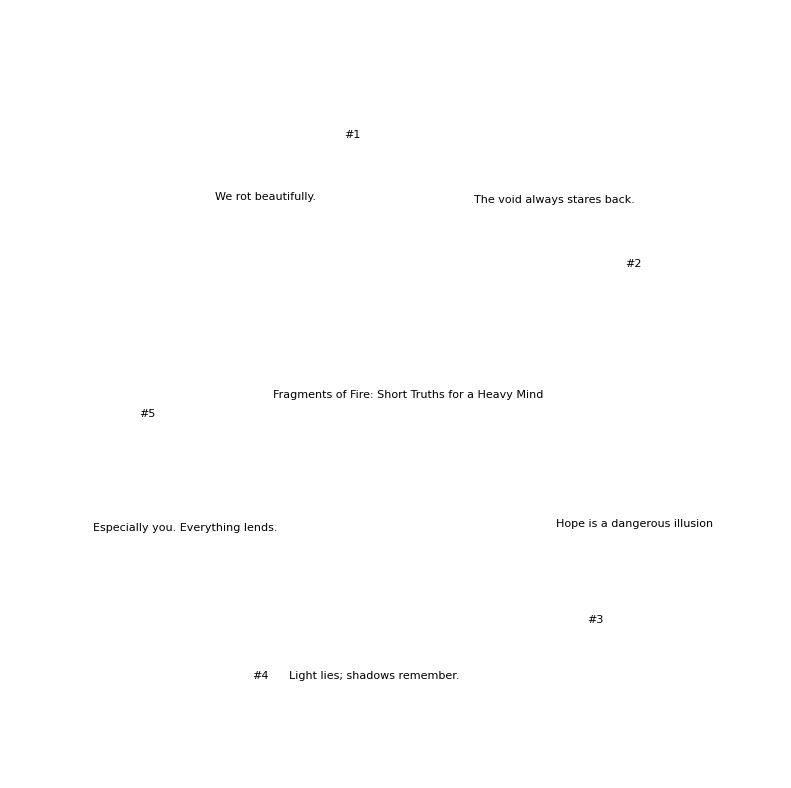

In [163]:
import json
import matplotlib.pyplot as plt


json_data = final_json_output

# --- Parse JSON ---
data = json_data
nodes = {node["id"]: node for node in data["nodes"]}
edges = data["edges"]
# --- Setup Canvas ---
fig, ax = plt.subplots(figsize=(data["canvas"]["width"]/100, data["canvas"]["height"]/100))
ax.set_xlim(0, data["canvas"]["width"])
ax.set_ylim(0, data["canvas"]["height"])
ax.invert_yaxis()
ax.axis("off")

for node in nodes.values():
    label = node["text"] if node["text"] else node["shape"]
    ax.text(node["x"], node["y"], label, ha="center", va="center", fontsize=8, color="black", wrap=True)
for edge in edges:
    src = nodes[edge["source"]]
    tgt = nodes[edge["target"]]
    x1, y1 = src["x"], src["y"]
    x2, y2 = tgt["x"], tgt["y"]
    ax.annotate("",
                xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle="->", color="gray", lw=1.2))
plt.tight_layout()
plt.show()

In [ ]:
!pip install pandas

Confusion metrix on the Output of the algorithm of arrow connections

----------------------------------------
   Algorithm Performance Metrics
----------------------------------------
True Positives (TP):  294
False Positives (FP): 10
False Negatives (FN): 10
True Negatives (TN):  Zero 0.

--- Key Metrics ---
Precision: 96.71%
Recall (Sensitivity): 96.71%
----------------------------------------



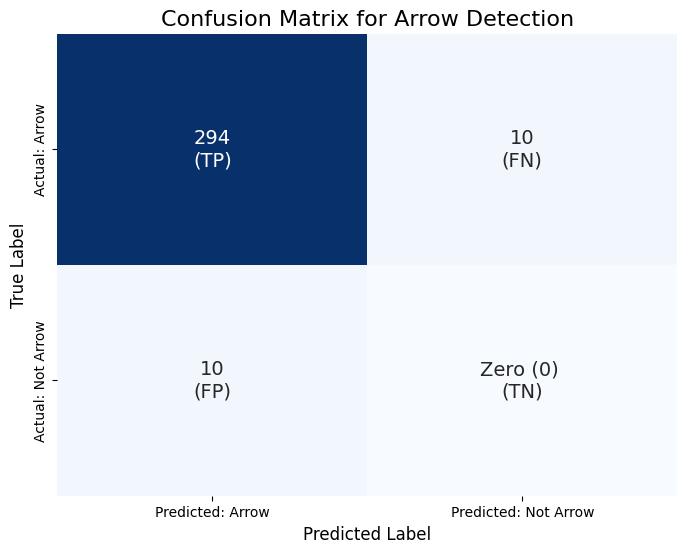

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def clean_and_extract_number(value):

    if pd.isna(value):
        return 0
    s_value = str(value).strip()
    parts = s_value.split(' ', 1)
    numeric_part = parts[0]

    try:
        return int(float(numeric_part))
    except (ValueError, TypeError):
        return 0

def create_confusion_matrix(file_path):

    try:
        df = pd.read_excel(file_path)
        df.columns = df.columns.str.strip()

        numeric_columns = ['TOTAL ARROW', 'CORECT ARROW NUMBER', 'WRONG ARROW NUMBER']
        for col in numeric_columns:
            if col in df.columns:
                df[col] = df[col].apply(clean_and_extract_number)
            else:
                print(f"Warning: Column '{col}' not found. Please check spelling in your Excel file.")

        true_positives = df['CORECT ARROW NUMBER'].sum()
        false_positives = df['WRONG ARROW NUMBER'].sum()
        false_negatives = (df['TOTAL ARROW'] - df['CORECT ARROW NUMBER']).sum()

        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

        print("----------------------------------------")
        print("   Algorithm Performance Metrics")
        print("----------------------------------------")
        print(f"True Positives (TP):  {true_positives}")
        print(f"False Positives (FP): {false_positives}")
        print(f"False Negatives (FN): {false_negatives}")
        print("True Negatives (TN):  Zero 0.")
        print("\n--- Key Metrics ---")
        print(f"Precision: {precision:.2%}")
        print(f"Recall (Sensitivity): {recall:.2%}")
        print("----------------------------------------\n")

        matrix_data = [[true_positives, false_negatives], [false_positives, 0]]

        matrix_labels = [
            [f"{true_positives}\n(TP)", f"{false_negatives}\n(FN)"],
            [f"{false_positives}\n(FP)", "Zero (0) \n(TN)"]
        ]

        plt.figure(figsize=(8, 6))
        sns.heatmap(matrix_data, annot=matrix_labels, fmt="", cmap='Blues',
                    xticklabels=['Predicted: Arrow', 'Predicted: Not Arrow'],
                    yticklabels=['Actual: Arrow', 'Actual: Not Arrow'],
                    cbar=False, annot_kws={"size": 14})

        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.title('Confusion Matrix for Arrow Detection', fontsize=16)

        # This command displays the plot
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == '__main__':
    file_path = '/content/REPORT.xlsx'
    create_confusion_matrix(file_path)

correct

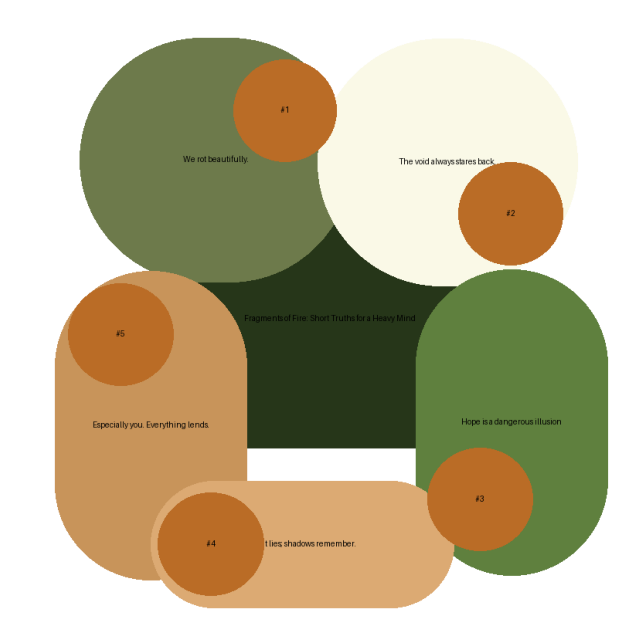

In [190]:
import json
import math
import textwrap
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

class DiagramGenerator:
    def __init__(self, json_data):
        self.data = json_data
        self.canvas_w = json_data['canvas']['width']
        self.canvas_h = json_data['canvas']['height']
        self.image = Image.new('RGB', (self.canvas_w, self.canvas_h), color='white')
        self.draw = ImageDraw.Draw(self.image)

        try:
            self.font = ImageFont.truetype("arial.ttf", 14)
            self.font_bold = ImageFont.truetype("arialbd.ttf", 13)
        except IOError:
            self.font = ImageFont.load_default()
            self.font_bold = ImageFont.load_default()

    def generate_image(self):
        nodes = self.data.get('nodes', [])


        sorted_nodes = sorted(nodes, key=lambda n: n['width'] * n['height'], reverse=True)

        for node in sorted_nodes:
            self.draw_node(node)

        for label in self.data.get('text_labels', []):
            self.draw_label(label)

        return self.image

    def get_bbox(self, node):
        cx, cy = node['x'], node['y']
        w, h = node['width'], node['height']
        return (cx - w/2, cy - h/2, cx + w/2, cy + h/2)

    def get_poly_points(self, cx, cy, w, h, shape_type):
        if shape_type == "diamond":
            return [(0, -h/2), (w/2, 0), (0, h/2), (-w/2, 0)]
        elif shape_type == "triangle":
            return [(0, -h/2), (w/2, h/2), (-w/2, h/2)]
        elif shape_type == "pentagon":
            return self._calculate_ngon(5, w/2, h/2)
        elif "arrow" in shape_type and "double" not in shape_type:
            head_len = w * 0.4
            return [(-w/2, -h/4), (w/2 - head_len, -h/4), (w/2 - head_len, -h/2),
                    (w/2, 0), (w/2 - head_len, h/2), (w/2 - head_len, h/4), (-w/2, h/4)]
        elif "double arrow" in shape_type:
            head_w = w * 0.2
            shaft_h = h * 0.4
            return [(-w/2, 0), (-w/2 + head_w, -h/2), (-w/2 + head_w, -shaft_h/2),
                    (w/2 - head_w, -shaft_h/2), (w/2 - head_w, -h/2), (w/2, 0),
                    (w/2 - head_w, h/2), (w/2 - head_w, shaft_h/2),
                    (-w/2 + head_w, shaft_h/2), (-w/2 + head_w, h/2)]
        return [(-w/2, -h/2), (w/2, -h/2), (w/2, h/2), (-w/2, h/2)]

    def draw_node(self, node):
        raw_shape = node.get('shape', 'rectangle')
        shape_type = raw_shape.lower().replace("_", " ").strip()

        cx, cy = node['x'], node['y']
        w, h = node['width'], node['height']

        color = node.get('color', '#cccccc')
        if len(color) == 9 and color.startswith('#'): color = color[:7]

        try: angle = float(node.get('angle', 0))
        except: angle = 0

        text = node.get('text', '')

        x1, y1, x2, y2 = self.get_bbox(node)

        if shape_type in ["circle", "ellipse", "start", "end"]:
            self.draw.ellipse([x1, y1, x2, y2], fill=color)
        elif shape_type == "racetrack" or shape_type == "terminal":
            self.draw.rounded_rectangle([x1, y1, x2, y2], radius=h/2, fill=color)
        elif shape_type in ["rounded rectangle", "process"]:
            self.draw.rounded_rectangle([x1, y1, x2, y2], radius=15, fill=color)
        elif shape_type == "cloud":
            self.draw.ellipse([x1, y1, x2, y2], fill=color)
        elif shape_type == "star":
            points = self._calculate_star_points(5, w/2, w/4)
            self._draw_rotated_polygon(points, cx, cy, angle, color)
        else:
            points = self.get_poly_points(cx, cy, w, h, shape_type)
            self._draw_rotated_polygon(points, cx, cy, angle, color)

        if text:
            self._draw_text_centered(text, cx, cy, w, h)

    def draw_label(self, label):
        self.draw.text((label['x'], label['y']), label.get('text', ''), font=self.font, fill="black")

    def _rotate_point(self, point, angle_deg):
        angle_rad = math.radians(angle_deg)
        x, y = point
        return (x * math.cos(angle_rad) - y * math.sin(angle_rad),
                x * math.sin(angle_rad) + y * math.cos(angle_rad))

    def _draw_rotated_polygon(self, points, cx, cy, angle, color):
        rotated = []
        for p in points:
            rx, ry = self._rotate_point(p, angle)
            rotated.append((cx + rx, cy + ry))
        self.draw.polygon(rotated, fill=color)

    def _calculate_ngon(self, sides, radius_x, radius_y):
        points = []
        for i in range(sides):
            angle = (2 * math.pi * i) / sides - (math.pi / 2)
            points.append((math.cos(angle) * radius_x, math.sin(angle) * radius_y))
        return points

    def _calculate_star_points(self, points_count, outer_radius, inner_radius):
        points = []
        angle_step = math.pi / points_count
        current_angle = -math.pi / 2
        for i in range(points_count * 2):
            radius = outer_radius if i % 2 == 0 else inner_radius
            points.append((math.cos(current_angle) * radius, math.sin(current_angle) * radius))
            current_angle += angle_step
        return points

    def _draw_text_centered(self, text, cx, cy, w, h):
        if not text: return

        char_w_approx = 6.5
        padding = 10
        max_chars = max(1, int((w - padding) / char_w_approx))

        lines = textwrap.wrap(text, width=max_chars)

        line_height = 14
        total_text_h = len(lines) * line_height

        current_y = cy - (total_text_h / 2)

        for line in lines:
            bbox = self.draw.textbbox((0, 0), line, font=self.font_bold)
            text_w = bbox[2] - bbox[0]
            text_x = cx - (text_w / 2)
            self.draw.text((text_x, current_y), line, font=self.font_bold, fill="black")
            current_y += line_height

if __name__ == "__main__":

    data = {
  "canvas": {
    "width": 801,
    "height": 798
  },
  "nodes": [
    {
      "id": "node1",
      "x": 649,
      "y": 534,
      "text": "Hope is a dangerous illusion",
      "shape": "Racetrack",
      "color": "#5f803e",
      "width": 248,
      "height": 395,
      "angle": {
        "angle": "290.7 ",
        "source": "ocr_text"
      }
    },
    {
      "id": "node2",
      "x": 143,
      "y": 420,
      "text": "#5",
      "shape": "circle",
      "color": "#ba6c26",
      "width": 136,
      "height": 132,
      "angle": ""
    },
    {
      "id": "node3",
      "x": 414,
      "y": 400,
      "text": "Fragments of Fire: Short Truths for a Heavy Mind",
      "shape": "Pentagon",
      "color": "#263619",
      "width": 431,
      "height": 415,
      "angle": {
        "angle": "0.0 ",
        "source": "ocr_text"
      }
    },
    {
      "id": "node4",
      "x": 566,
      "y": 197,
      "text": "The void always stares back.",
      "shape": "Racetrack",
      "color": "#faf9e7",
      "width": 335,
      "height": 320,
      "angle": {
        "angle": "41.2 ",
        "source": "ocr_text"
      }
    },
    {
      "id": "node5",
      "x": 260,
      "y": 692,
      "text": "#4",
      "shape": "circle",
      "color": "#ba6c26",
      "width": 137,
      "height": 133,
      "angle": ""
    },
    {
      "id": "node6",
      "x": 608,
      "y": 634,
      "text": "#3",
      "shape": "circle",
      "color": "#ba6c26",
      "width": 136,
      "height": 133,
      "angle": ""
    },
    {
      "id": "node7",
      "x": 266,
      "y": 194,
      "text": "We rot beautifully.",
      "shape": "Racetrack",
      "color": "#6d7a4b",
      "width": 351,
      "height": 317,
      "angle": {
        "angle": "0.0 ",
        "source": "ocr_text"
      }
    },
    {
      "id": "node8",
      "x": 648,
      "y": 264,
      "text": "#2",
      "shape": "circle",
      "color": "#ba6c26",
      "width": 135,
      "height": 133,
      "angle": ""
    },
    {
      "id": "node9",
      "x": 356,
      "y": 130,
      "text": "#1",
      "shape": "circle",
      "color": "#ba6c26",
      "width": 133,
      "height": 132,
      "angle": ""
    },
    {
      "id": "node10",
      "x": 378,
      "y": 692,
      "text": "Light lies; shadows remember.",
      "shape": "Racetrack",
      "color": "#dcaa73",
      "width": 391,
      "height": 163,
      "angle": {
        "angle": "2.5 ",
        "source": "ocr_text"
      }
    },
    {
      "id": "node11",
      "x": 182,
      "y": 538,
      "text": "Especially you. Everything lends.",
      "shape": "Racetrack",
      "color": "#c8945a",
      "width": 249,
      "height": 399,
      "angle": {
        "angle": "178.0 ",
        "source": "ocr_text"
      }
    }
  ],
  "edges": [],
  "text_labels": []
}

    gen = DiagramGenerator(data)
    final_img = gen.generate_image()

    plt.figure(figsize=(10, 8))
    plt.imshow(final_img)
    plt.axis('off')
    plt.show()